# RUN AWAY FROM ELISA

In [1]:
from IPython.display import Image, display

# INTRODUCTION/BUSINESS PROBLEM

I recently broke up with my girlfriend Elisa. Me and my ex-girlfriend live in Rome, municipio 2 (for our pourposes, you can interpret municipio as the italian for borough). I love my municipio but now I want to move, because I can't live in her same municipio.
So I want to move to another municipio in Rome or Milan.
I'm looking for a municipio with similar food and bar venues, with a good transportation system and with a good cultural offer.
So I will ask the following question.

## 'Based on the previous criteria, which municipio of Rome and Milan is more similar to municipio 2 of Rome?'

# DATA

We will use the following data:
- An .shp file, containing some information about municipi of Rome, downloaded by the official site of 'Comune di Roma' (http://websit.cittametropolitanaroma.it/Download.aspx)
- An .shp file, containing some information about municipi of Milan, downloaded by the official site of 'Comune di Milano' (https://geoportale.comune.milano.it/sit/open-data/)
- The wikipedia's page of Comune di Milano https://it.wikipedia.org/wiki/Municipi_di_Milano#Schema_delle_zone_di_Milano.
- A .csv file, containing the addresses of the municipi of Milan.
- Foursquare, that we will use to get the venues of all municipi.

The .shp file of Rome contains information about the population, the municipalities, the shape of the municipi (hence the area and the coordinates).

The .shp file of Milan contains information about the shape of the municipi. The wikipedia's page contains information about the population.

We will use Foursquare get methods 'https://api.foursquare.com/v2/venues/explore' (to search all venues of each municipio) and 'https://api.foursquare.com/v2/venues/search' (to search all venues of each municipio in a fixed category).

We will focus on the following categories:
- Food
- Bars
- Transportation categories (metro, ferries, tram...)
- Fun venues (cinemas, theaters...)

The following is a sample of the dataframe that we will create and that we will work with.

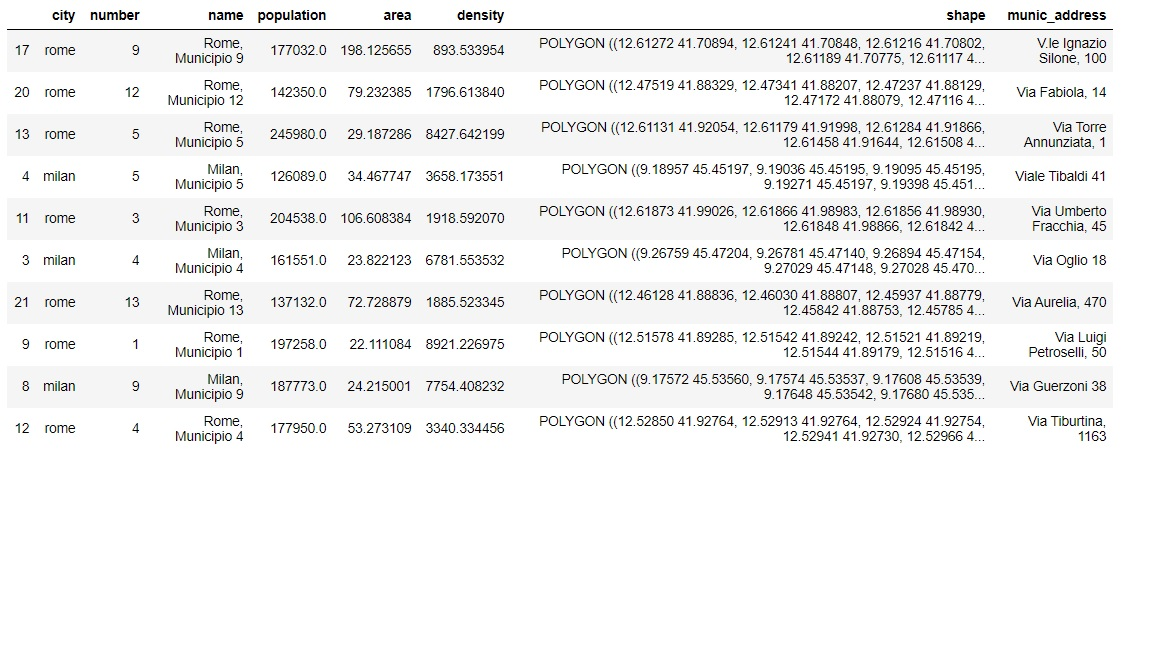

In [2]:
display(Image(filename='df3.jpg'))

# METHODOLOGY

In a first part of the work we will create a dataframe (df3) with all the informations that we need. Every row will refer to a municipio and the columns contain information about:
- Municipio's city
- Municipio's number
- Municipio's name
- Municipio's shape (the colum geometry of the .shp file)
- Municipality latitude and longitude
- Representative latitude and longitude
- Centroid latitude and longitude
- Municipio's population
- Municipio's area
- Municipio's density of population

Then we will visualize our data with bar charts and maps (puntured and choropleth).

Then we will use the Foursquare method.

In order to do this we will assign to each municipio a circle. We will choose the center of the circle between the municipality, the representation point and the centroid (our choice will be the representative point) and we will calculate the radius of each circle (see the notebook for more details).

Then we will be ready to use Foursquare.

In a first moment, we will use the Foursquare get method 'https://api.foursquare.com/v2/venues/explore' to get all the venues in each municipio of each city. Then we will analyze all venues retrieved and we will clusterize all municipi, according to venues, using KMeans and choosing the best K with the elbow method (see the notebook).
This is a preliminary work, just to get familiar with all the methods and make sure that our code runs.

Then we will be ready to approach our problem.
We will use the Foursquare get method 'https://api.foursquare.com/v2/venues/search' to get all the venues of each municipio in the following two categories:
- Food venues
- Bar venues

Then we will analyze all the venues retrieved and we will get two different clusterizations of the municipi, using KMeans and choosing the best K with the elbow method (see the notebook).

In the last part of the work, we will use the Foursquare get method 'https://api.foursquare.com/v2/venues/search' to get all the venues of each municipio in the following categories:
- Transportation venues (metro, ferries, tram...)
- Fun venues (cinemas, theaters...)

We will assign a transportation score and a fun score to each municipio, dividing all municipi in four quartiles (see the notebook).

We will finally select all the municipi of Rome and Milan that satisfy the following criteria:
- They are not municipio 2 of Rome (where my ex-girlfriend live).
- They are in the same food cluster of municipio 2 of Rome.
- They are in the same bar cluster of municipio 2 of Rome.
- They are in the 1st and 2nd quartile according to transportation score.
- They are in the 1st and 2nd quartile according to fun score.

# RESULTS

The following are choropleth maps of Rome and Milan, where the variable is the density of population.

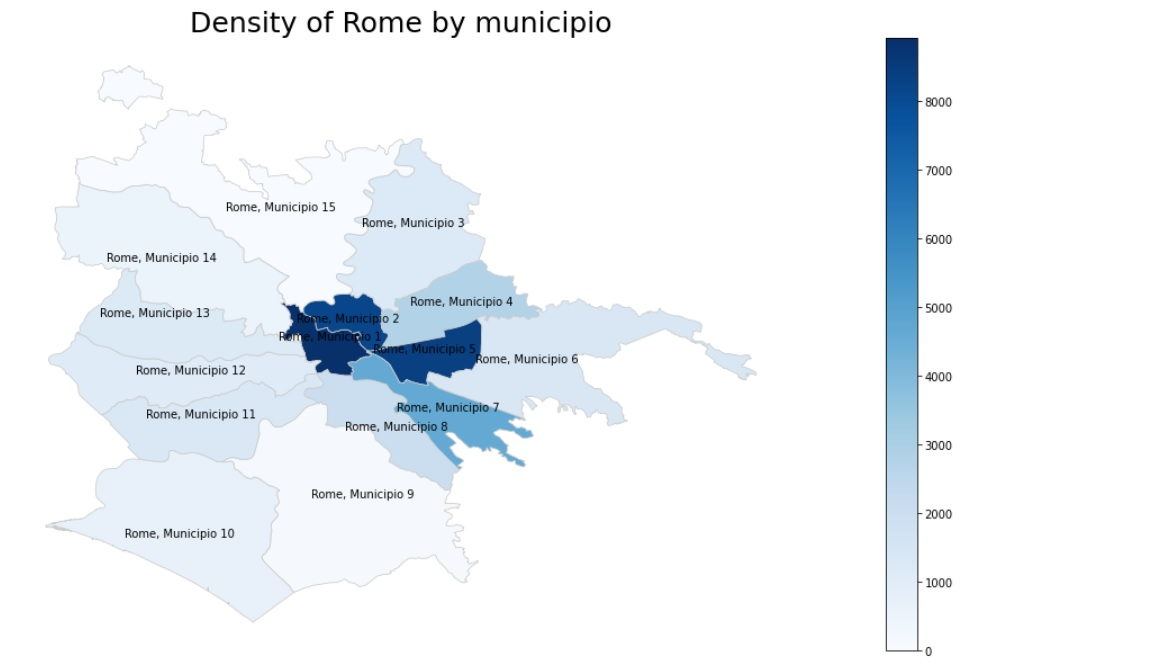

In [3]:
display(Image(filename='rome_density.jpg'))

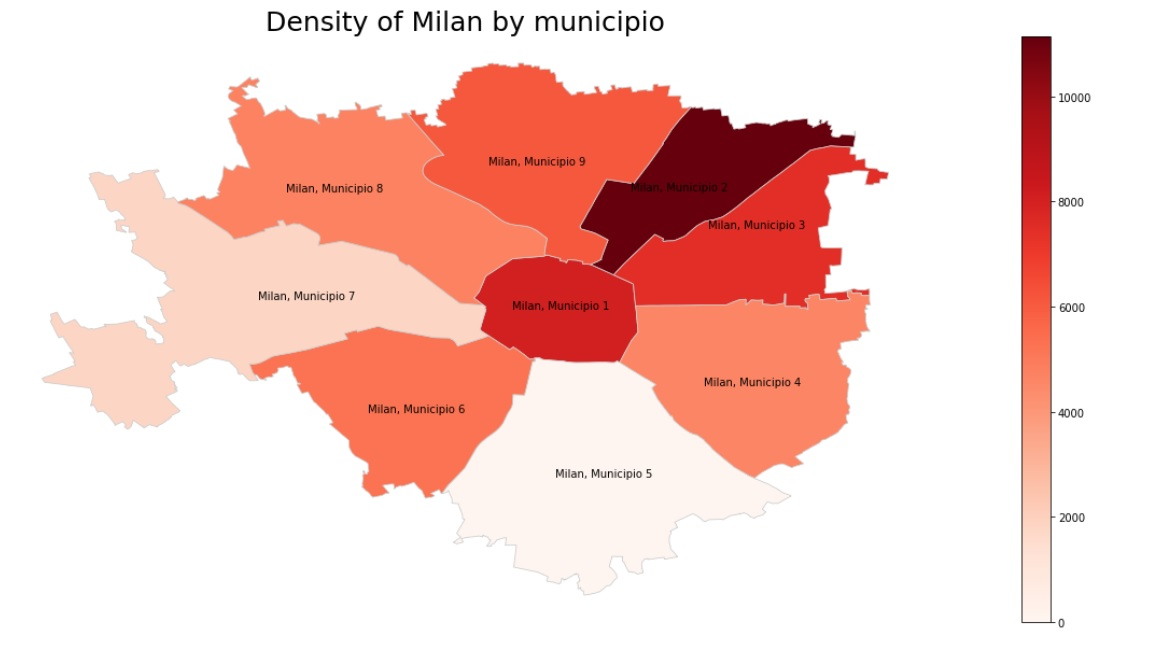

In [4]:
display(Image(filename='milan_density.jpg'))

The following are maps of Rome, with the municipi's borders and centroids, representative points and municipalities. As you can see, the best choice is to take representative points.

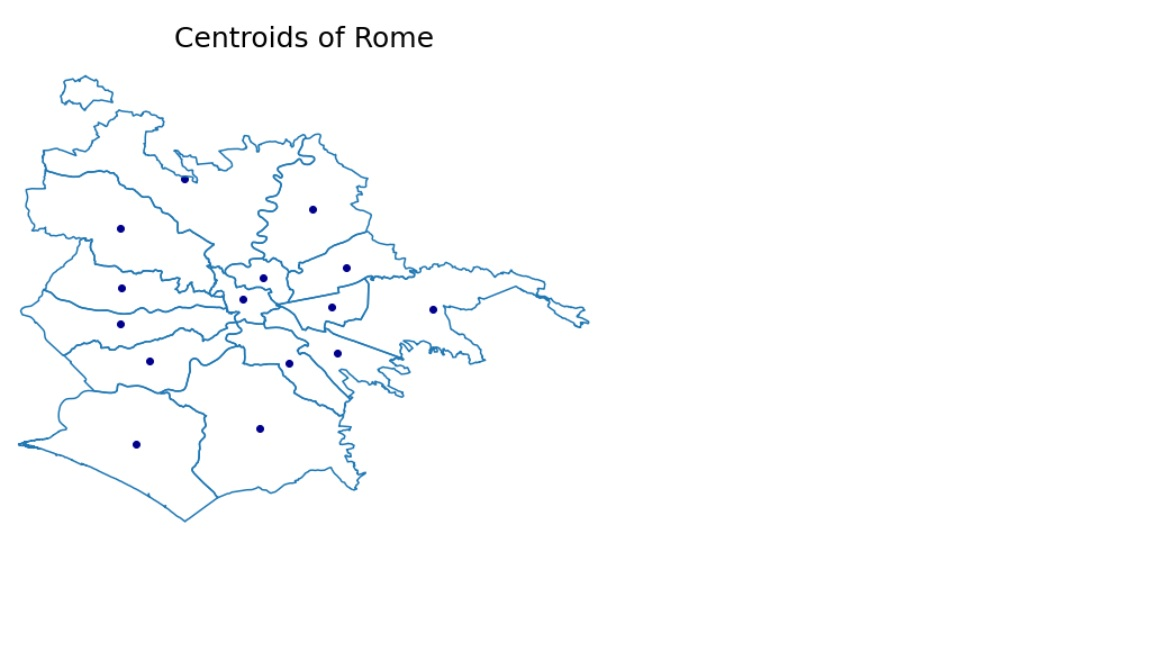

In [5]:
display(Image(filename='rome_centroids.jpg'))

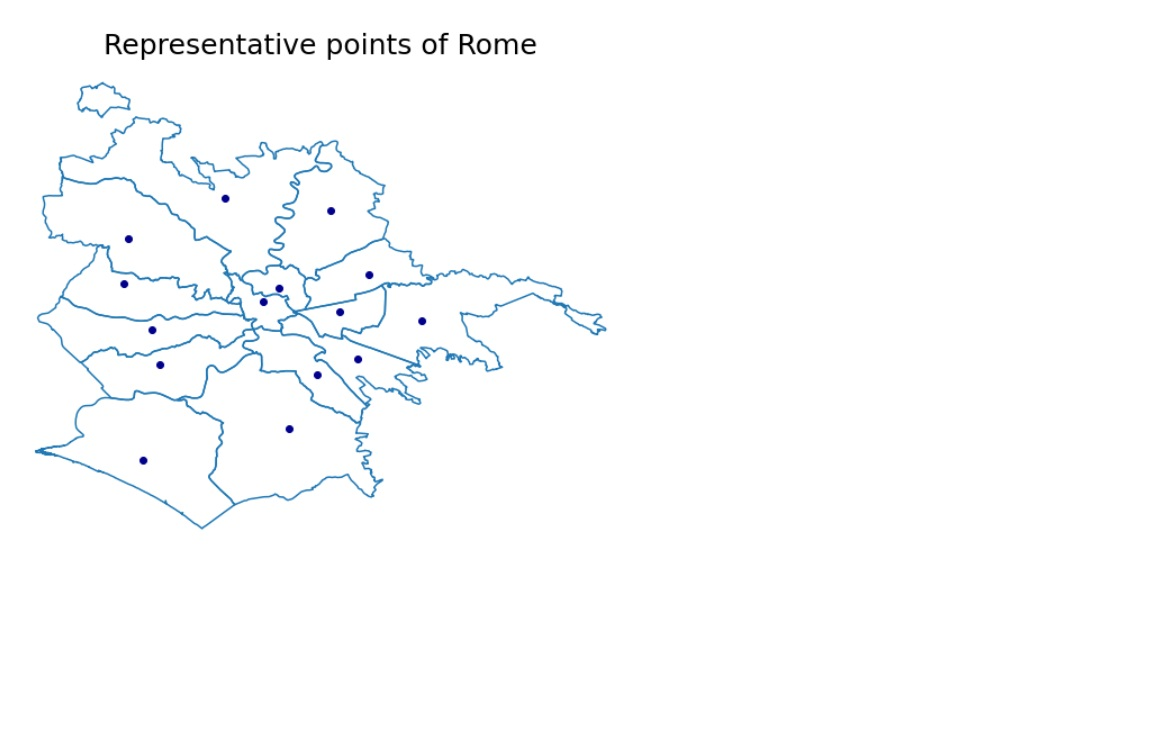

In [6]:
display(Image(filename='rome_repr_points.jpg'))

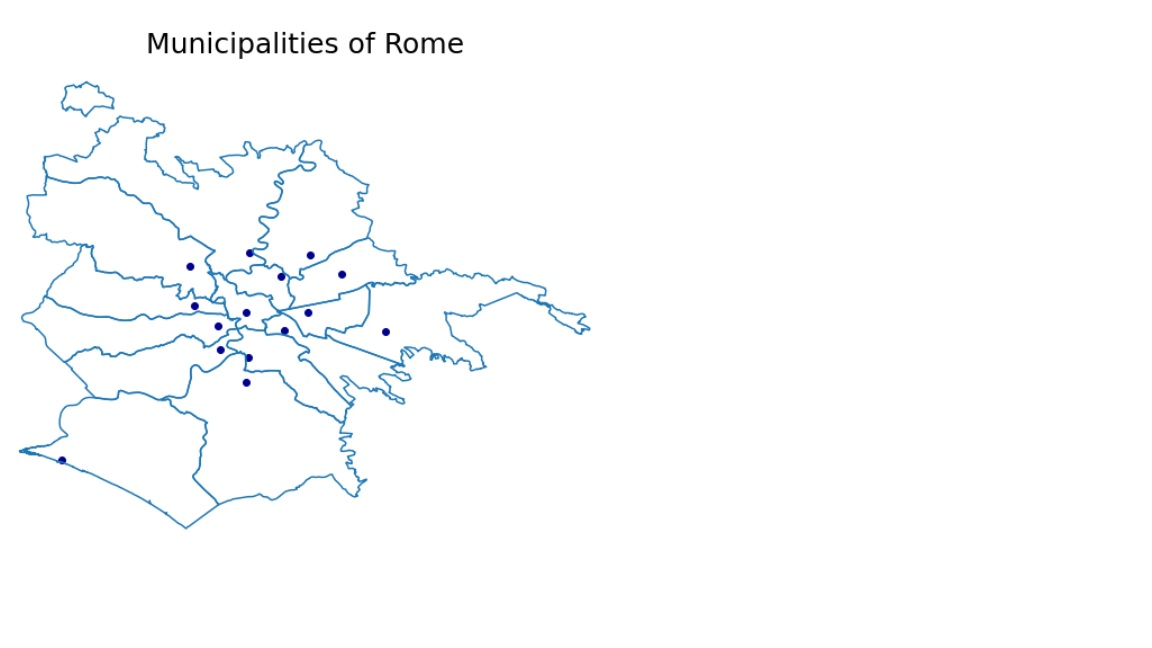

In [7]:
display(Image(filename='rome_municipalities.jpg'))

The following are maps of Rome and Milan, where the point are the representative points of the municipi and the colors refer to food cluster.

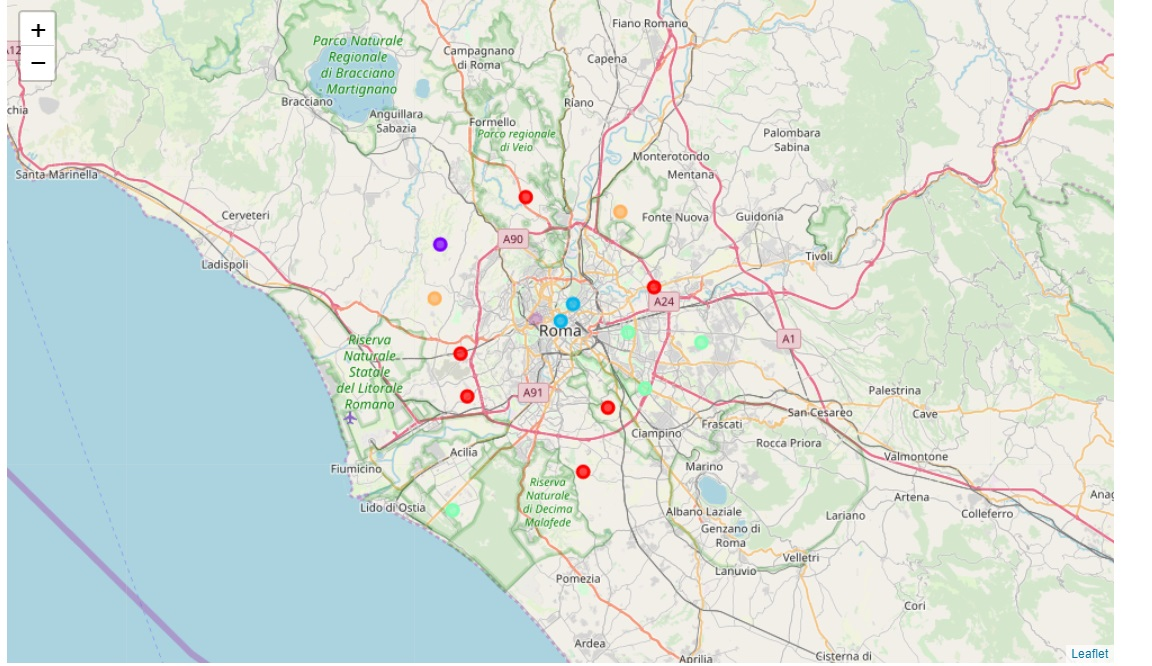

In [8]:
display(Image(filename='rome_food_clusters.jpg'))

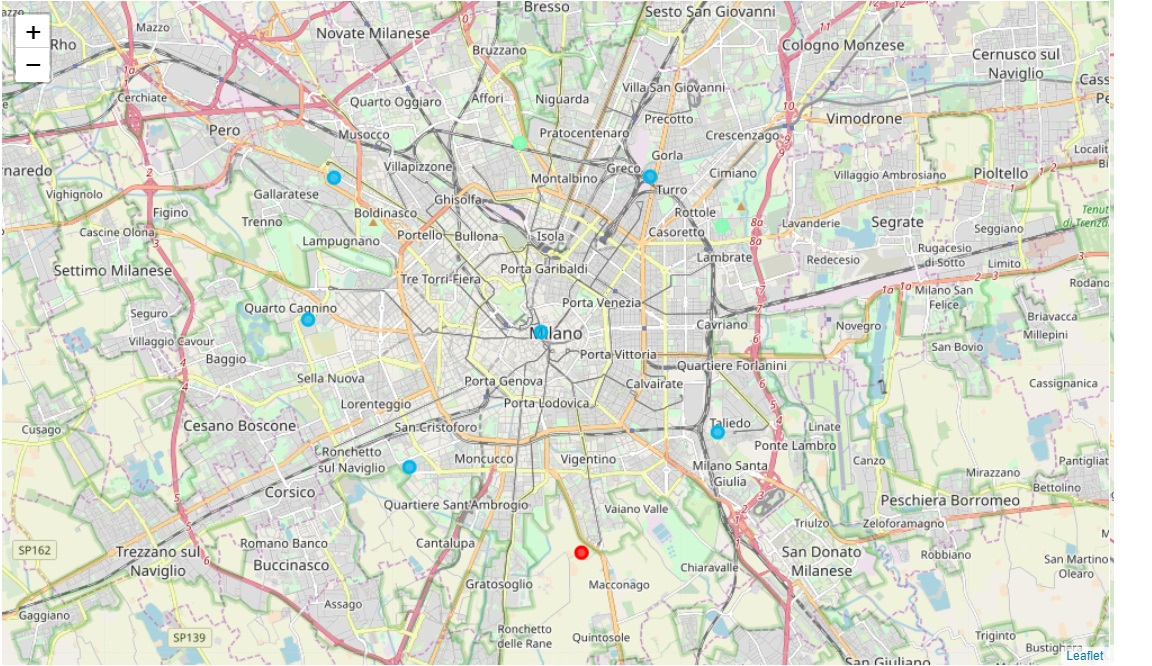

In [9]:
display(Image(filename='milan_food_clusters.jpg'))

The following are choropleth maps of Rome and Milan, where the point are the representative points of the municipi and the colors refer to bar cluster.

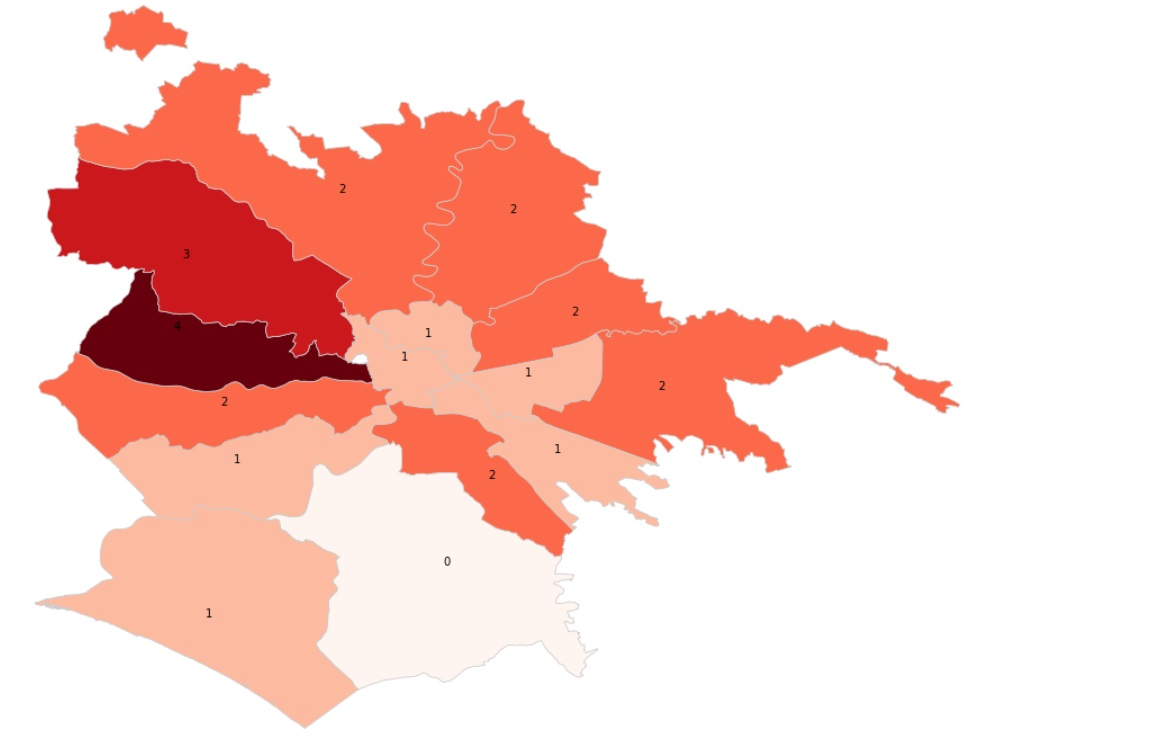

In [10]:
display(Image(filename='rome_bar_clusters.jpg'))

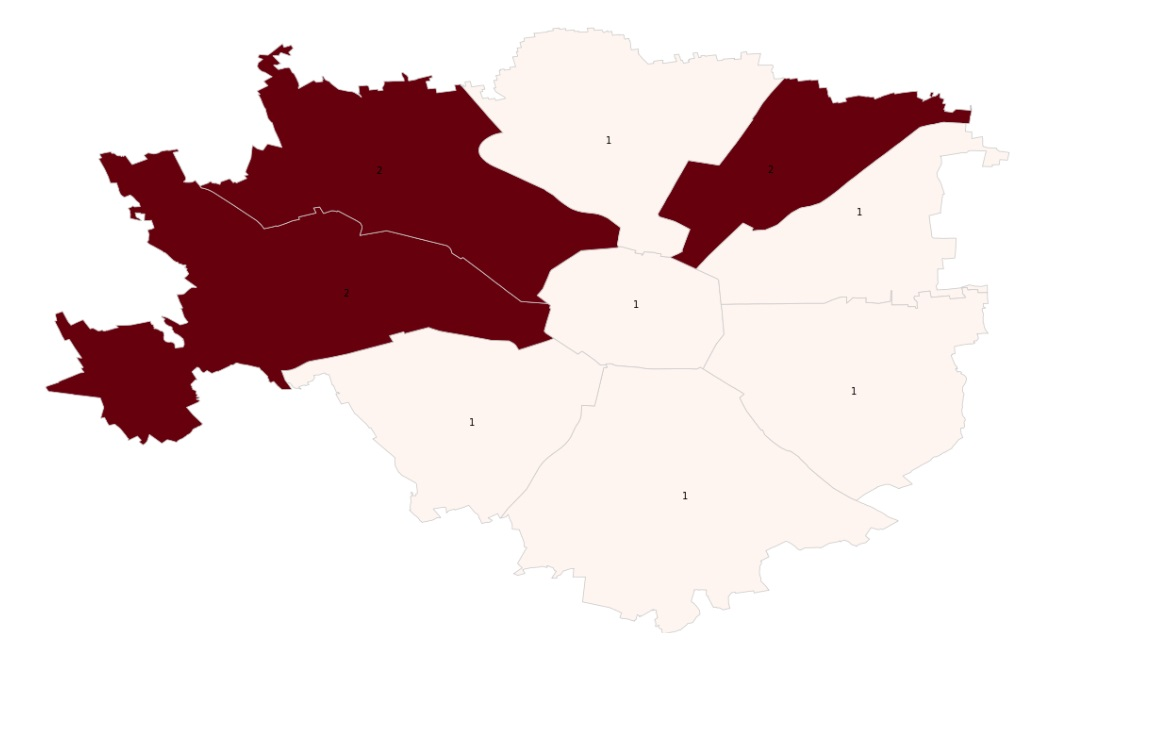

In [11]:
display(Image(filename='milan_bar_clusters.jpg'))

The following is a database with informations about transportation and fun score of each municipio.
Foursquare does not work so well in Italy, that's why NaN values.

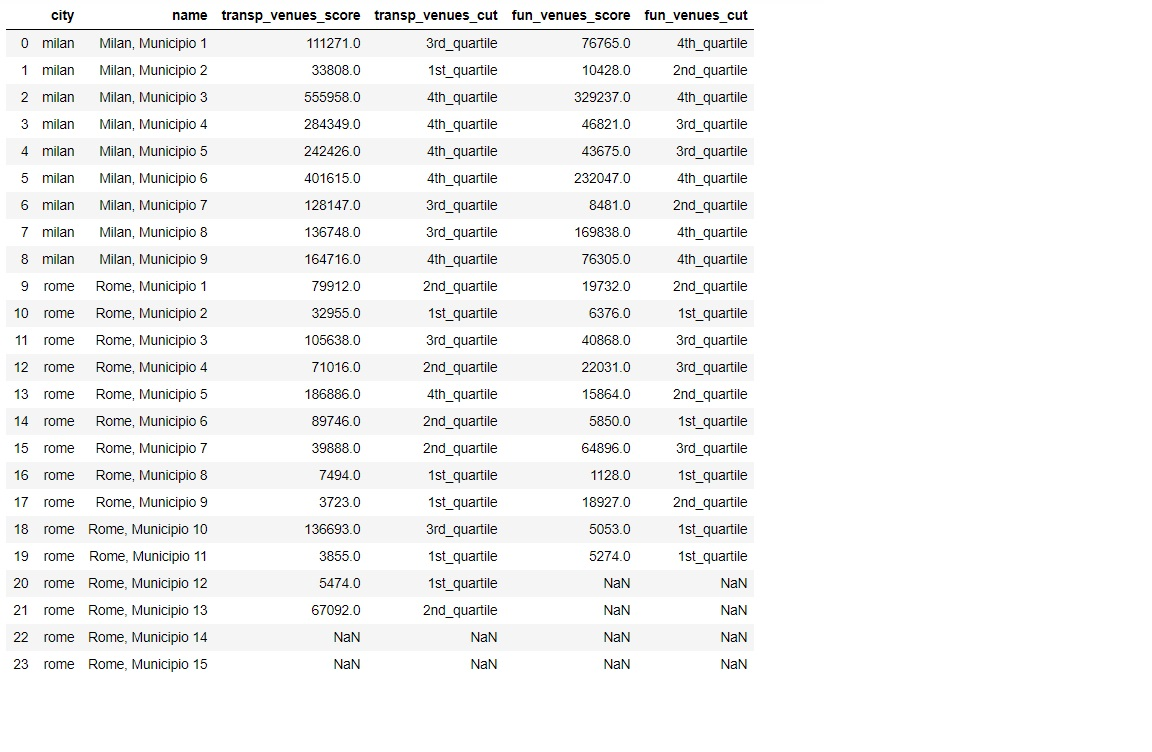

In [12]:
display(Image(filename='transp_fun.jpg'))

# DISCUSSION

We selected all the municipi of Rome and Milan that satisfy the following criteria:
- They are not municipio 2 of Rome (where my ex-girlfriend lives).
- They are in the same food cluster of municipio 2 of Rome.
- They are in the same bar cluster of municipio 2 of Rome.
- They are in the 1st and 2nd quartile according to transportation score.
- They are in the 1st and 2nd quartile according to fun score.

The analysis is not exhaustive. Clearly other criteria may be used to infer the best municipio. I choose those criteria according to my personal taste, other choices may be done.

I remark that Foursquare does not perform very well in Italy. That's why the results can appear limited.
However, the employed methods and all the functions that I wrote can work with every city in the world. You only need a .shp file of the city, with municipi's shape and information about population.
You can also change the criteria, just changing the foursquare categories (food, bar, transportations, fun).

The majority of data are not updated and incoherent. For example the information about population of Rome and Milan refer to different years. I focused on the consistence of my code and not on the reliability of the data that I used.

To be honest, if you download the .shp file from the official website of Comune di Roma, you have a problem, because the don't specify which CRS they used. They work with EPGS 3004, I converted it, with an external program, to the standard EPGS 4326 to use the same CRS of Milan data. I really don't now how to do it in my code.

# CONCLUSIONS

## The optimal municipio is municipio 1 in Rome. I will move next to the Coliseum!!!

# REFERENCES

- Official site of Comune di Roma http://websit.cittametropolitanaroma.it/Download.aspx
- Official site of Comune di Milano https://geoportale.comune.milano.it/sit/open-data/
- Wikipedia https://it.wikipedia.org/wiki/Municipi_di_Milano#Schema_delle_zone_di_Milano
- Foursquare https://developer.foursquare.com/docs/resources/categories